## 1b

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
sims_cores = pd.read_csv('mpi_health_sim.out', sep=' ', names=['rank','size','n_sims','time (s)'])
sims_cores.head()

,rank,size,n_sims,time
0,0,1,1000,0.361401
1,1,2,500,0.160702
2,0,2,500,0.159851
3,1,3,333,0.107450
4,0,3,333,0.106985


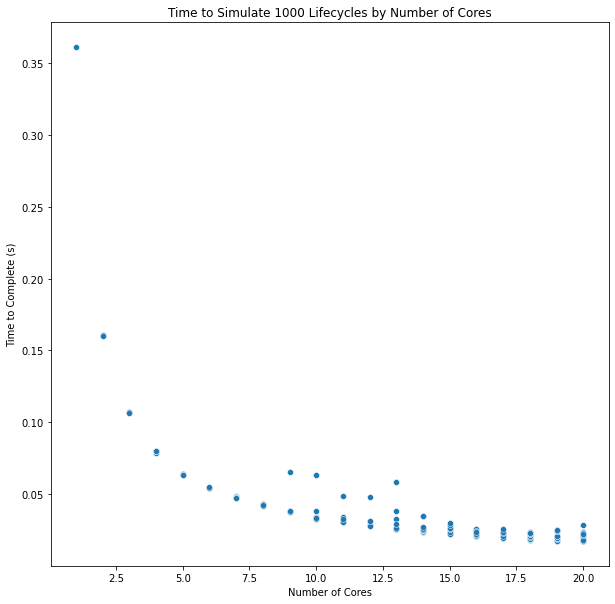

In [19]:
f, ax = plt.subplots(1,1,figsize=(10,10))

sns.scatterplot(x=sims_cores['size'], y=sims_cores['time'])
plt.ylabel('Time to Complete (s)')
plt.xlabel('Number of Cores')
plt.title('Time to Simulate 1000 Lifecycles by Number of Cores')

plt.savefig('simtime_cores.png',dpi=200)

## 2a

In [16]:
rho_sims = pd.read_csv('mpi_rho_tests_numbacc.out',names=['temp'])
rho_sims

,temp
0,6 10 1000 1.6105499267578125
1,[[1.95728643e-01 1.08757000e+03]
2,[2.05276382e-01 1.05058000e+03]
3,[2.14824121e-01 1.04826300e+03]
4,[2.24371859e-01 1.03635100e+03]
...,...
205,[ 0.72085427 52.816 ]
206,[ 0.73040201 49.613 ]
207,[ 0.73994975 46.837 ]
208,[ 0.74949749 44.18 ]


In [48]:
rho_poor_health_min_times = pd.DataFrame(columns=['rho','min_poor_health_period'])
core_details = pd.DataFrame(columns=['rank','size','num_lives','time_elapsed'])
core_details

,rank,size,num_lives,time_elapsed


In [49]:
for idx, row in rho_sims.iterrows():
    row = row[0].strip()
    if row[0] == '[':
        vals = row.strip('[').strip(']')
        vals = vals.split()
        #print(vals)
        rho = float(vals[0].strip())
        period = float(vals[1].strip())
        vals_df = pd.DataFrame({'rho':rho, 'min_poor_health_period':period},index=[idx])
        #print(vals_df)
        rho_poor_health_min_times = rho_poor_health_min_times.append(vals_df)
    else:
        vals = row.split()
        print(vals)
        rank = int(vals[0])
        size = int(vals[1])
        num_lives = int(vals[2])
        time_elapsed = float(vals[3])
        vals_df = pd.DataFrame({'rank':rank, 'size':size, 'num_lives':num_lives,\
            'time_elapsed':time_elapsed}, index=[idx])
        core_details = core_details.append(vals_df)

['6', '10', '1000', '1.6105499267578125']
['5', '10', '1000', '1.6155781745910645']
['0', '10', '1000', '1.6193416118621826']
['1', '10', '1000', '1.6186425685882568']
['2', '10', '1000', '1.6229562759399414']
['7', '10', '1000', '1.649947166442871']
['4', '10', '1000', '1.6551249027252197']
['9', '10', '1000', '1.661433219909668']
['3', '10', '1000', '1.661792516708374']
['8', '10', '1000', '1.6621551513671875']


In [50]:
rho_poor_health_min_times

,rho,min_poor_health_period
1,0.195729,1087.570
2,0.205276,1050.580
3,0.214824,1048.263
4,0.224372,1036.351
5,0.233920,1002.056
...,...,...
205,0.720854,52.816
206,0.730402,49.613
207,0.739950,46.837
208,0.749497,44.180


In [51]:
core_details

,rank,size,num_lives,time_elapsed
0,6,10,1000,1.610550
21,5,10,1000,1.615578
42,0,10,1000,1.619342
63,1,10,1000,1.618643
84,2,10,1000,1.622956
105,7,10,1000,1.649947
126,4,10,1000,1.655125
147,9,10,1000,1.661433
168,3,10,1000,1.661793
189,8,10,1000,1.662155


In [55]:
np.mean(core_details['time_elapsed'])

1.637752151489258

## 2b

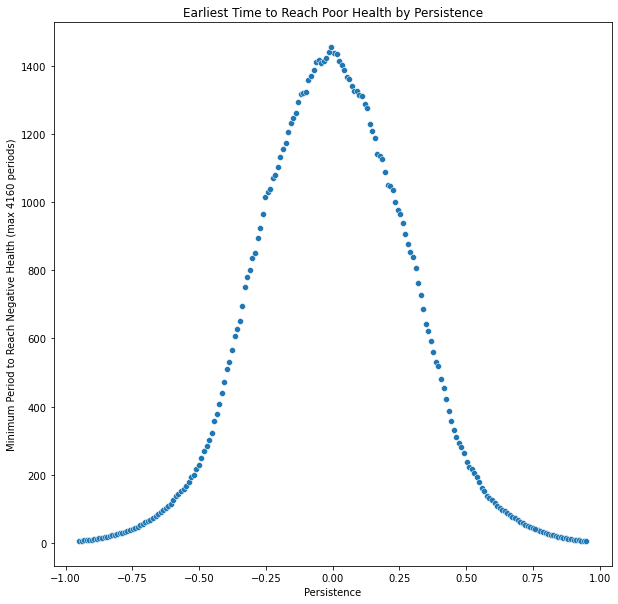

In [59]:
f, ax = plt.subplots(1,1,figsize=(10,10))

sns.scatterplot(x=rho_poor_health_min_times['rho'],y=rho_poor_health_min_times['min_poor_health_period'])
plt.ylabel('Minimum Period to Reach Negative Health (max 4160 periods)')
plt.xlabel('Persistence')
plt.title('Earliest Time to Reach Poor Health by Persistence')

plt.savefig('rho_tests.png',dpi=200)


In [60]:
rho_poor_health_min_times.sort_values(by='min_poor_health_period')

,rho,min_poor_health_period
167,0.950000,5.087
43,-0.950000,5.676
166,0.940452,5.755
44,-0.940452,6.382
165,0.930905,6.552
...,...,...
144,-0.023869,1424.857
23,0.014322,1434.480
22,0.004774,1437.802
145,-0.014322,1440.653
